# Preprocessing

Import python modules

In [1]:
import pandas as pd
import numpy as np
import pycombat
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

## Load gene expression and metadata

In [2]:
import_expression_filepath = "data/processed/expression_brain_only.csv" 
import_metadata_filepath = "data/processed/metadata_brain_only.csv"
export_expression_filepath = "data/processed/expression_gbm_lgg.csv" 
export_metadata_filepath = "data/processed/metadata_gbm_lgg.csv"

In [4]:
gene_expression_df = pd.read_csv(
    import_expression_filepath,
    # index_col='sample_id'
)
print("Expression Shape:", gene_expression_df.shape)
display(gene_expression_df.head())

Expression Shape: (60498, 1840)


,sample_id,TCGA-19-1787-01,TCGA-S9-A7J2-01,GTEX-13QIC-0011-R1a-SM-5O9CJ,TCGA-E1-A7YI-01,TCGA-06-5412-01,TCGA-DU-7302-01,TCGA-DU-A7TI-01,GTEX-N7MS-2526-SM-26GMA,GTEX-N7MS-2526-SM-26GMR,...,TCGA-06-0745-01,GTEX-13G51-0011-R6b-SM-5LZX4,TCGA-TM-A84B-01,GTEX-YFC4-0011-R10a-SM-4SOK5,TCGA-DU-A76O-01,GTEX-13112-0011-R4b-SM-5DUXL,GTEX-1313W-0011-R1b-SM-5EQ4A,TCGA-CS-4944-01,TCGA-HT-7603-01,GTEX-Q2AG-2826-SM-2HMJQ
0,ENSG00000242268,-9.9658,0.2998,-9.9658,-0.4521,-4.2934,-2.5479,-0.6193,-0.5756,-2.8262,...,-1.2481,-1.0262,1.1117,-0.6416,-9.9658,-2.5479,-1.5522,-9.9658,-9.9658,0.0440
1,ENSG00000259041,-9.9658,-9.9658,-9.9658,-9.9658,-9.9658,-9.9658,-9.9658,-9.9658,-9.9658,...,-9.9658,-9.9658,-9.9658,-9.9658,-9.9658,-9.9658,-9.9658,-9.9658,-9.9658,-9.9658
2,ENSG00000270112,-3.8160,-3.0469,-1.8314,-0.7346,0.1519,0.9115,-2.6349,3.7204,1.7489,...,1.2147,-0.8599,1.8242,1.2576,-6.5064,-1.0862,0.6880,-4.2934,1.0642,2.5852
3,ENSG00000167578,5.2998,4.8881,6.4989,5.7632,6.1687,5.6329,5.8709,6.0086,2.1894,...,6.0330,5.6789,4.6809,6.5322,6.2263,5.5100,6.1258,6.6567,6.8560,5.8110
4,ENSG00000278814,-9.9658,-9.9658,-9.9658,-9.9658,-9.9658,-9.9658,-9.9658,-9.9658,-9.9658,...,-9.9658,-9.9658,-9.9658,-9.9658,-9.9658,-9.9658,-9.9658,-9.9658,-9.9658,-9.9658


In [17]:
metadata_df = pd.read_csv(
    import_metadata_filepath,
    # index_col='sample_id'
)

print("\nMetadata Shape:", metadata_df.shape)
display(metadata_df.head())


Metadata Shape: (1839, 7)


,sample_id,detailed_category,primary disease or tissue,_primary_site,_sample_type,_gender,_study
0,TCGA-06-0152-02,Glioblastoma Multiforme,Glioblastoma Multiforme,Brain,Recurrent Tumor,Male,TCGA
1,TCGA-06-0171-02,Glioblastoma Multiforme,Glioblastoma Multiforme,Brain,Recurrent Tumor,Male,TCGA
2,TCGA-06-0190-02,Glioblastoma Multiforme,Glioblastoma Multiforme,Brain,Recurrent Tumor,Male,TCGA
3,TCGA-19-1389-02,Glioblastoma Multiforme,Glioblastoma Multiforme,Brain,Recurrent Tumor,Male,TCGA
4,TCGA-14-0736-02,Glioblastoma Multiforme,Glioblastoma Multiforme,Brain,Recurrent Tumor,Male,TCGA


## Prepare samples

### label mapping
- 1 - healthy.
- 2 - Lower Grade Glioma.
- 3 - Glioblastoma Multiforme.

In [14]:
unhealthy_metadata = metadata_df[(
    (metadata_df['_sample_type'] == 'Primary Tumor')
)]
print(f"Created Unhealthy group with {len(unhealthy_metadata)} samples.")

unhealthy_lgg_metadata = unhealthy_metadata[
    unhealthy_metadata['primary disease or tissue'] == 'Brain Lower Grade Glioma'
].copy()
print(f"Created Unhealthy LGG group with {len(unhealthy_lgg_metadata)} samples.")
unhealthy_lgg_metadata['label'] = 2

unhealthy_gbm_metadata = unhealthy_metadata[
    unhealthy_metadata['primary disease or tissue'] == 'Glioblastoma Multiforme'
].copy()
print(f"Created Unhealthy GBM group with {len(unhealthy_gbm_metadata)} samples.")
unhealthy_gbm_metadata['label'] = 3


combined_metadata_df = pd.concat([unhealthy_lgg_metadata, unhealthy_gbm_metadata])
combined_metadata_df.info()

Created Unhealthy group with 660 samples.
Created Unhealthy LGG group with 508 samples.
Created Unhealthy GBM group with 152 samples.
<class 'pandas.core.frame.DataFrame'>
Index: 660 entries, 179 to 164
Data columns (total 8 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   sample_id                  660 non-null    object
 1   detailed_category          660 non-null    object
 2   primary disease or tissue  660 non-null    object
 3   _primary_site              660 non-null    object
 4   _sample_type               660 non-null    object
 5   _gender                    660 non-null    object
 6   _study                     660 non-null    object
 7   label                      660 non-null    int64 
dtypes: int64(1), object(7)
memory usage: 46.4+ KB


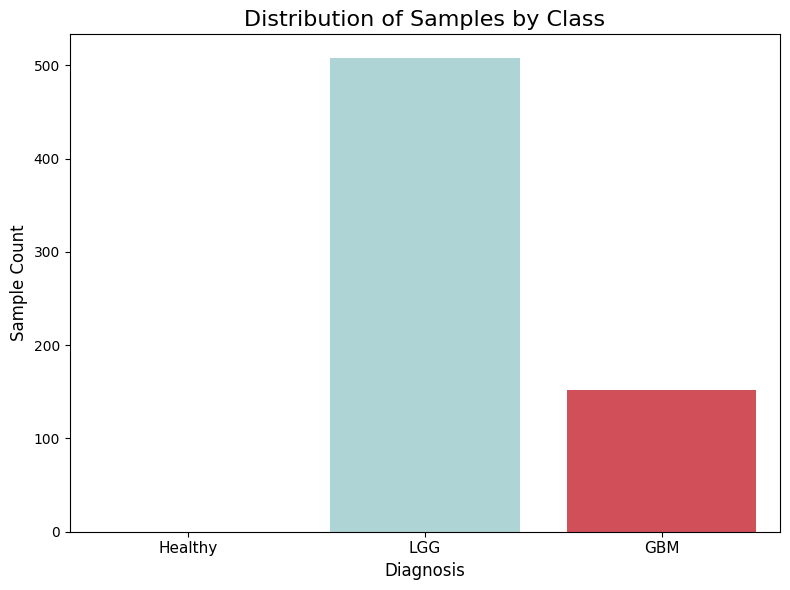

In [15]:
# --- 1. Create a copy and map labels for plotting ---
plot_df = combined_metadata_df.copy()

# Define the new string labels
label_map = {
    1: 'Healthy',
    2: 'LGG',
    3: 'GBM'
}
plot_df['Diagnosis'] = plot_df['label'].map(label_map)

# --- 2. Create the plot ---
plt.figure(figsize=(8, 6))

# Define the order we want the bars to appear in
plot_order = ['Healthy', 'LGG', 'GBM']

# Define a clear color palette
plot_palette = {
    'Healthy': '#457B9D', 
    'LGG': '#A8DADC', 
    'GBM': '#E63946'
}

sns.countplot(
    x='Diagnosis',
    data=plot_df,
    order=plot_order,
    palette=plot_palette,
    hue='Diagnosis', # We still map hue to get the colors
    legend=False
)

plt.title('Distribution of Samples by Class', fontsize=16)
plt.xlabel('Diagnosis', fontsize=12)
plt.ylabel('Sample Count', fontsize=12)
plt.xticks(fontsize=11)
plt.tight_layout()
plt.show()

In [19]:
combined_metadata_df

,sample_id,detailed_category,primary disease or tissue,_primary_site,_sample_type,_gender,_study,label
179,TCGA-DU-A76K-01,Brain Lower Grade Glioma,Brain Lower Grade Glioma,Brain,Primary Tumor,Male,TCGA,2
180,TCGA-HT-7616-01,Brain Lower Grade Glioma,Brain Lower Grade Glioma,Brain,Primary Tumor,Male,TCGA,2
181,TCGA-HT-7687-01,Brain Lower Grade Glioma,Brain Lower Grade Glioma,Brain,Primary Tumor,Male,TCGA,2
182,TCGA-E1-A7YS-01,Brain Lower Grade Glioma,Brain Lower Grade Glioma,Brain,Primary Tumor,Male,TCGA,2
183,TCGA-DH-A669-01,Brain Lower Grade Glioma,Brain Lower Grade Glioma,Brain,Primary Tumor,Male,TCGA,2
...,...,...,...,...,...,...,...,...
160,TCGA-12-0616-01,Glioblastoma Multiforme,Glioblastoma Multiforme,Brain,Primary Tumor,Female,TCGA,3
161,TCGA-12-3653-01,Glioblastoma Multiforme,Glioblastoma Multiforme,Brain,Primary Tumor,Female,TCGA,3
162,TCGA-06-2569-01,Glioblastoma Multiforme,Glioblastoma Multiforme,Brain,Primary Tumor,Female,TCGA,3
163,TCGA-06-5416-01,Glioblastoma Multiforme,Glioblastoma Multiforme,Brain,Primary Tumor,Female,TCGA,3


In [21]:
gene_expression_df

,sample_id,TCGA-19-1787-01,TCGA-S9-A7J2-01,GTEX-13QIC-0011-R1a-SM-5O9CJ,TCGA-E1-A7YI-01,TCGA-06-5412-01,TCGA-DU-7302-01,TCGA-DU-A7TI-01,GTEX-N7MS-2526-SM-26GMA,GTEX-N7MS-2526-SM-26GMR,...,TCGA-06-0745-01,GTEX-13G51-0011-R6b-SM-5LZX4,TCGA-TM-A84B-01,GTEX-YFC4-0011-R10a-SM-4SOK5,TCGA-DU-A76O-01,GTEX-13112-0011-R4b-SM-5DUXL,GTEX-1313W-0011-R1b-SM-5EQ4A,TCGA-CS-4944-01,TCGA-HT-7603-01,GTEX-Q2AG-2826-SM-2HMJQ
0,ENSG00000242268,-9.9658,0.2998,-9.9658,-0.4521,-4.2934,-2.5479,-0.6193,-0.5756,-2.8262,...,-1.2481,-1.0262,1.1117,-0.6416,-9.9658,-2.5479,-1.5522,-9.9658,-9.9658,0.0440
1,ENSG00000259041,-9.9658,-9.9658,-9.9658,-9.9658,-9.9658,-9.9658,-9.9658,-9.9658,-9.9658,...,-9.9658,-9.9658,-9.9658,-9.9658,-9.9658,-9.9658,-9.9658,-9.9658,-9.9658,-9.9658
2,ENSG00000270112,-3.8160,-3.0469,-1.8314,-0.7346,0.1519,0.9115,-2.6349,3.7204,1.7489,...,1.2147,-0.8599,1.8242,1.2576,-6.5064,-1.0862,0.6880,-4.2934,1.0642,2.5852
3,ENSG00000167578,5.2998,4.8881,6.4989,5.7632,6.1687,5.6329,5.8709,6.0086,2.1894,...,6.0330,5.6789,4.6809,6.5322,6.2263,5.5100,6.1258,6.6567,6.8560,5.8110
4,ENSG00000278814,-9.9658,-9.9658,-9.9658,-9.9658,-9.9658,-9.9658,-9.9658,-9.9658,-9.9658,...,-9.9658,-9.9658,-9.9658,-9.9658,-9.9658,-9.9658,-9.9658,-9.9658,-9.9658,-9.9658
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
60493,ENSG00000273233,-1.2481,-1.2142,-1.8314,-3.1714,-3.1714,-9.9658,-3.0469,-9.9658,-9.9658,...,-1.6394,-0.7834,-3.3076,1.1770,-1.7322,-1.0559,-2.0529,-9.9658,-1.1172,-0.8863
60494,ENSG00000105063,5.2661,4.8151,4.8182,5.7372,5.0193,5.2570,5.4353,4.9141,2.0912,...,4.2266,4.9723,6.6468,5.7576,5.3611,4.5528,5.4601,3.1442,4.7082,5.2843
60495,ENSG00000231119,-0.2159,-3.3076,-1.3921,-2.3884,1.5998,-3.1714,-2.3147,-0.7346,-0.4921,...,-1.5105,-1.5951,-2.0529,-2.1140,-2.5479,-2.5479,-2.3884,-2.2447,-1.7322,-2.5479
60496,ENSG00000280861,-9.9658,-9.9658,-9.9658,-9.9658,-9.9658,-9.9658,-9.9658,-9.9658,-9.9658,...,-9.9658,-9.9658,-9.9658,-9.9658,-9.9658,-9.9658,-9.9658,-9.9658,-9.9658,-9.9658


In [23]:
b_samples_to_keep = combined_metadata_df['sample_id'].tolist()

print(f"Total samples to keep for analysis: {len(b_samples_to_keep)}")
expression_indexed_df = gene_expression_df.set_index('sample_id')
filtered_genes = expression_indexed_df[
    expression_indexed_df.columns.intersection(b_samples_to_keep)
].copy()

print(f"Filtered expression matrix shape: {filtered_genes.shape}")

print("\n--- Pipeline B Complete ---")
print(f"Final `gene` matrix shape: {filtered_genes.shape}")
display(filtered_genes.head())

Total samples to keep for analysis: 660
Filtered expression matrix shape: (60498, 660)

--- Pipeline B Complete ---
Final `gene` matrix shape: (60498, 660)


,TCGA-19-1787-01,TCGA-S9-A7J2-01,TCGA-E1-A7YI-01,TCGA-06-5412-01,TCGA-DU-7302-01,TCGA-DU-A7TI-01,TCGA-16-0846-01,TCGA-12-5299-01,TCGA-P5-A5EX-01,TCGA-HT-8563-01,...,TCGA-FG-7636-01,TCGA-DU-5847-01,TCGA-28-2509-01,TCGA-DU-6406-01,TCGA-06-2558-01,TCGA-06-0745-01,TCGA-TM-A84B-01,TCGA-DU-A76O-01,TCGA-CS-4944-01,TCGA-HT-7603-01
sample_id,,,,,,,,,,,,,,,,,,,,,
ENSG00000242268,-9.9658,0.2998,-0.4521,-4.2934,-2.5479,-0.6193,-0.8863,-2.8262,-3.0469,-1.6394,...,-9.9658,-0.8863,-9.9658,0.2762,-1.0862,-1.2481,1.1117,-9.9658,-9.9658,-9.9658
ENSG00000259041,-9.9658,-9.9658,-9.9658,-9.9658,-9.9658,-9.9658,-9.9658,-9.9658,-9.9658,-9.9658,...,-9.9658,-9.9658,-9.9658,-9.9658,-9.9658,-9.9658,-9.9658,-9.9658,-9.9658,-9.9658
ENSG00000270112,-3.8160,-3.0469,-0.7346,0.1519,0.9115,-2.6349,-1.2481,-1.0559,-9.9658,-3.8160,...,-4.2934,-4.2934,-0.9686,-2.1140,-0.1504,1.2147,1.8242,-6.5064,-4.2934,1.0642
ENSG00000167578,5.2998,4.8881,5.7632,6.1687,5.6329,5.8709,6.1851,5.5732,5.6419,5.7978,...,5.6094,6.1379,5.0721,6.0926,5.6879,6.0330,4.6809,6.2263,6.6567,6.8560
ENSG00000278814,-9.9658,-9.9658,-9.9658,-9.9658,-9.9658,-9.9658,-9.9658,-9.9658,-9.9658,-9.9658,...,-9.9658,-9.9658,-9.9658,-9.9658,-9.9658,-9.9658,-9.9658,-9.9658,-9.9658,-9.9658


## Store data for ease of use 

In [ ]:
labels_df = combined_metadata_df.set_index('sample_id').copy()
final_labels_df = labels_df[['label']]

# We add index_label='sample_id' here too for consistency
final_labels_df.to_csv(export_metadata_filepath, index_label='sample_id')
print(f"Labels saved to: {export_metadata_filepath}")

Labels saved to: data/processed/metadata_gbm_lgg.csv


In [ ]:
gene_T = filtered_genes.T

scaler = StandardScaler()
gene_scaled_array = scaler.fit_transform(gene_T)

# --- 4. Convert Scaled Data Back to DataFrame ---
gene_scaled_df = pd.DataFrame(
    gene_T,
    index=gene_T.index,
    columns=gene_T.columns
)

# We add index_label='sample_id' to name the first column
gene_scaled_df.to_csv(export_expression_filepath, index_label='sample_id')
print(f"Scaled data saved to: {export_expression_filepath}")